# <span style="color:green;">UTS Model Deployment</span>

## Zaneta Fransiske - 2702312146
### Dataset B (Obesity2) - Case 1

<span style="color: red; font-size: 19px;">A. Exploratory Data Analysis (EDA)</span>

#### Import Library

Berbagai library yang dibutuhkan diimpor:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.impute import SimpleImputer
import pickle

#### Membaca Dataset 
Dataset dibaca menggunakan fungsi `read_csv()` dari library `pandas`. File dataset bernama `ObesityDataset2.csv` yang berada di direktori lokal dibaca dengan delimiter koma (`,`), yang merupakan standar pada file CSV.

Dataset ini disimpan dalam variabel `df` untuk digunakan pada tahap-tahap selanjutnya, seperti eksplorasi data, preprocessing, dan pelatihan model.

In [2]:
df = pd.read_csv('C:/COOLYEAH/SEM 4/Model Deployment/UAS/ObesityDataSet2.csv', delimiter =",")

#### Eksplorasi Awal Dataset

Langkah ini bertujuan untuk memahami struktur dan karakteristik dasar dari dataset:

- `df.head()` menampilkan 5 baris pertama dari dataset, berguna untuk melihat tampilan awal data.
- `df.tail()` menampilkan 5 baris terakhir, berguna untuk memastikan konsistensi data hingga akhir file.
- `df.shape[0]` dan `df.shape[1]` digunakan untuk mengetahui jumlah baris (data) dan kolom (fitur) dalam dataset.
- `df.info()` memberikan informasi detail tentang tipe data di setiap kolom serta jumlah nilai non-null, yang membantu dalam mendeteksi missing values atau fitur dengan tipe data yang tidak sesuai.
- `df.describe()` menampilkan statistik deskriptif seperti nilai minimum, maksimum, mean, dan kuartil dari kolom numerik, yang berguna untuk mendapatkan gambaran umum distribusi data.

In [3]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,24,1.58,65.29,yes,no,2.03,2.74,Sometimes,no,2.00,no,1.28,1.019,no,Public_Transportation,Overweight_Level_II
1,Male,23,1.65,66.00,no,no,3.00,3.00,Sometimes,no,2.00,no,3.00,0.000,no,Public_Transportation,Normal_Weight
2,Female,21,1.69,51.26,yes,yes,3.00,3.18,Frequently,no,1.91,no,0.48,0.625,no,Public_Transportation,Insufficient_Weight
3,Female,22,1.69,65.00,yes,yes,2.00,3.00,Sometimes,no,2.00,no,1.00,1.000,Sometimes,Public_Transportation,Normal_Weight
4,Female,23,1.61,82.64,yes,yes,2.96,1.00,Sometimes,no,2.98,no,0.74,2.000,Sometimes,Public_Transportation,Obesity_Type_I


In [4]:
df.tail()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
1051,Female,21,1.74,130.93,yes,yes,3.00,3.00,Sometimes,no,1.85,no,1.46,0.962,Sometimes,Public_Transportation,Obesity_Type_III
1052,Female,17,1.54,57.26,no,yes,1.97,2.34,Sometimes,no,1.71,yes,0.10,1.191,Sometimes,Public_Transportation,Overweight_Level_I
1053,Female,19,1.60,45.00,no,no,3.00,3.00,no,no,3.00,yes,2.00,0.000,no,Walking,Insufficient_Weight
1054,Female,25,1.69,113.45,yes,yes,3.00,3.00,Sometimes,no,2.99,no,0.39,0.284,Sometimes,Public_Transportation,Obesity_Type_III
1055,Male,27,1.81,118.28,yes,yes,2.24,3.00,Sometimes,no,2.68,no,0.98,0.000,Sometimes,Public_Transportation,Obesity_Type_II


In [5]:
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

Number of rows: 1056
Number of columns: 17


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056 entries, 0 to 1055
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          1056 non-null   object 
 1   Age                             1056 non-null   object 
 2   Height                          1056 non-null   float64
 3   Weight                          1056 non-null   float64
 4   family_history_with_overweight  1056 non-null   object 
 5   FAVC                            1056 non-null   object 
 6   FCVC                            1019 non-null   float64
 7   NCP                             1056 non-null   float64
 8   CAEC                            1056 non-null   object 
 9   SMOKE                           1056 non-null   object 
 10  CH2O                            1056 non-null   float64
 11  SCC                             1056 non-null   object 
 12  FAF                             10

In [7]:
df.describe()

,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,1056.000000,1056.000000,1019.000000,1056.000000,1056.000000,1056.000000,1056.000000
mean,1.700066,86.497633,2.421374,2.651686,1.998002,0.987528,0.642227
std,0.091560,26.181219,0.537591,0.804457,0.612930,0.850452,0.615533
min,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,1.630000,66.000000,2.000000,2.525000,1.530000,0.110000,0.000000
50%,1.700000,82.635000,2.390000,3.000000,2.000000,1.000000,0.583000
75%,1.760000,107.965000,3.000000,3.000000,2.442500,1.602500,1.000000
max,1.950000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


#### Check Data Duplikat
Mencari apakah terdapat baris yang duplikat dalam dataset

In [8]:
duplicates = df[df.duplicated()]
print(duplicates)

     Gender Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
96     Male  21    1.62    70.0                             no  yes   2.0   
227    Male  21    1.62    70.0                             no  yes   2.0   
285    Male  21    1.62    70.0                             no  yes   2.0   
326    Male  21    1.62    70.0                             no  yes   2.0   
436  Female  22    1.69    65.0                            yes  yes   2.0   
558  Female  18    1.62    55.0                            yes  yes   2.0   
701  Female  21    1.52    42.0                             no  yes   3.0   
949    Male  21    1.62    70.0                             no  yes   2.0   
960  Female  16    1.66    58.0                             no   no   2.0   
996    Male  21    1.62    70.0                             no  yes   2.0   

     NCP        CAEC SMOKE  CH2O SCC  FAF  TUE       CALC  \
96   1.0          no    no   3.0  no  1.0  0.0  Sometimes   
227  1.0          no    no   3

Baris dengan indeks 96, 227, 285, 326, 949, dan 996 memiliki isi yang benar-benar identik di semua kolom. Ini merupakan duplikat data yang persis sama dan akan dihapus agar tidak memengaruhi hasil analisis atau pelatihan model.

Baris dengan indeks 436, 558, 701, dan 960 memiliki kemiripan dalam beberapa kolom, tapi tidak identik di semua (duplikat parsial)

#### Check Missing Value

Mendeteksi kolom mana yang memiliki missing value

In [9]:
missing_values = df.isnull().sum()
print("\nMissing Values in Each Column:")
print(missing_values)


Missing Values in Each Column:
Gender                             0
Age                                0
Height                             0
Weight                             0
family_history_with_overweight     0
FAVC                               0
FCVC                              37
NCP                                0
CAEC                               0
SMOKE                              0
CH2O                               0
SCC                                0
FAF                                0
TUE                                0
CALC                               0
MTRANS                            26
NObeyesdad                         0
dtype: int64


#### Check Value Unik

Melihat distribusi nilai unik di setiap kolom dengan tipe data objek


In [10]:
for c in df.columns:
  if df[c].dtype == 'object':
    print(f"\n")
    print(df[c].value_counts())



Gender
Male      532
Female    524
Name: count, dtype: int64


Age
21          128
23          118
18          107
26          102
19           79
22           73
20           69
24           42
17           36
25           35
30           29
31           29
38           23
27           21
33           19
34           15
32           14
29           13
16           12
37           11
39           11
28            9
41            9
35            9
40            8
21 years      4
55            3
44            3
36            2
46            2
19 years      2
45            2
23 years      2
22 years      2
42            2
33 years      1
48            1
51            1
43            1
17 years      1
15            1
26 years      1
36 years      1
20 years      1
25 years      1
14            1
Name: count, dtype: int64


family_history_with_overweight
yes    862
no     194
Name: count, dtype: int64


FAVC
yes    935
no     121
Name: count, dtype: int64


CAEC
Sometimes     870
Frequent

#### Check Outlier Pada Numerical Data
Visualisasi, deteksi dengan IQR, dan mengukur skewness untuk memeriksa distribusi dan outliers dari kolom-kolom numerik

##### <span style="color: gray; font-size: 15px;">Boxplot & Data Distribution</span>

In [11]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

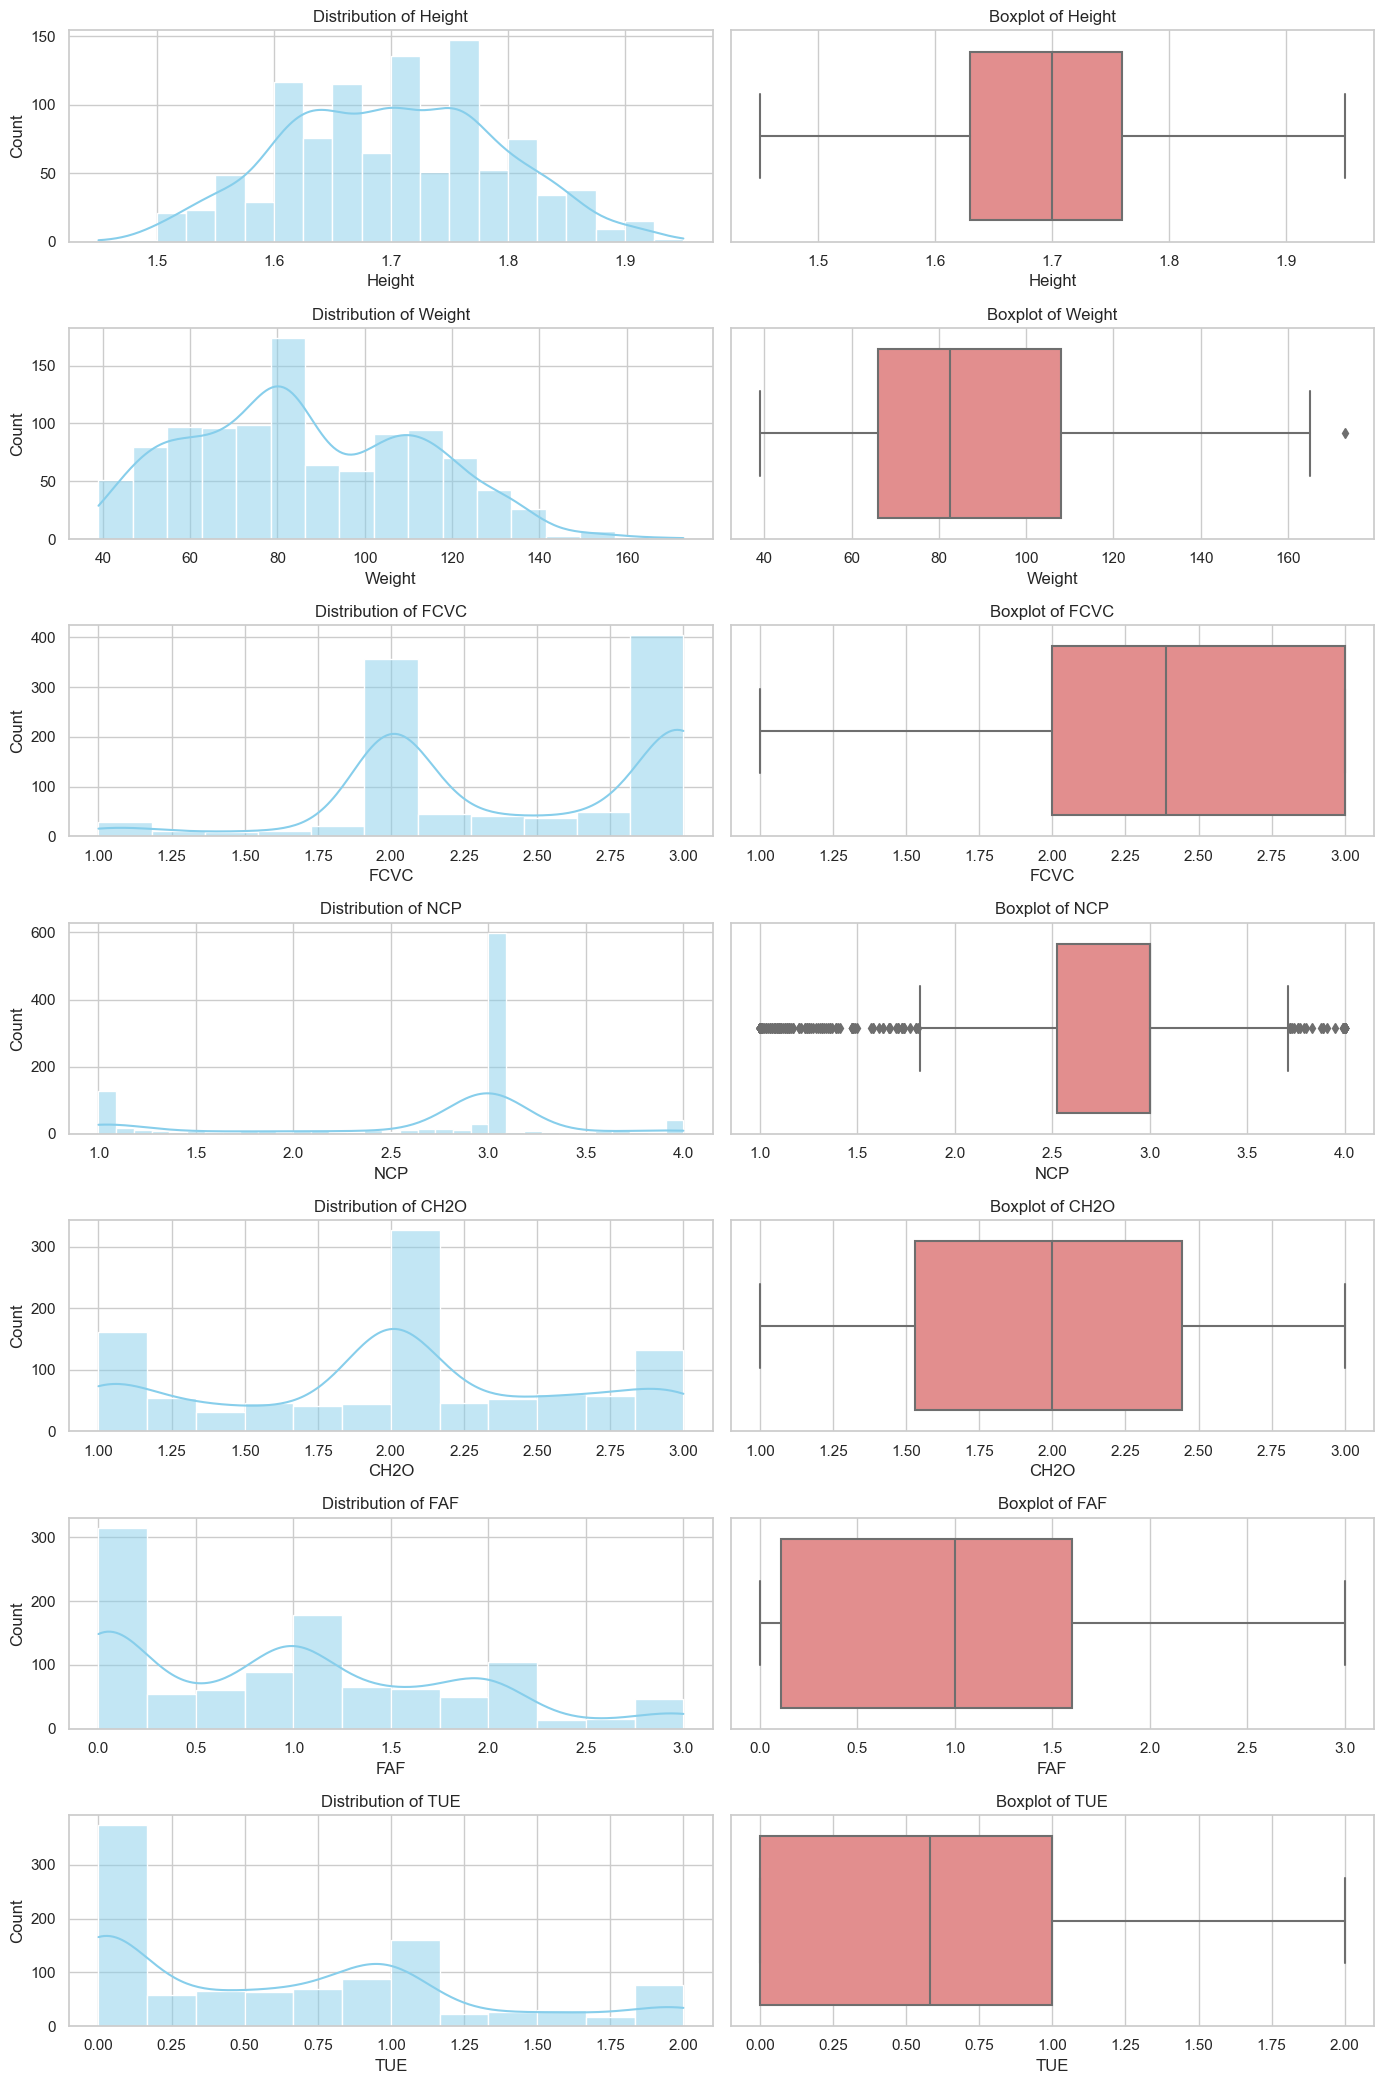

In [12]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(nrows=len(numeric_cols), ncols=2, figsize=(14, len(numeric_cols)*3))

for i, col in enumerate(numeric_cols):
    sns.histplot(df[col], kde=True, ax=axes[i, 0], color='skyblue')
    axes[i, 0].set_title(f'Distribution of {col}')
    
    sns.boxplot(x=df[col], ax=axes[i, 1], color='lightcoral')
    axes[i, 1].set_title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

Kolom Weight terdapat 1 titik outlier di bagian kanan (berat ekstrem >160).

Kolom NCP terlihat banyak titik outlier di sisi kiri dan kanan

##### <span style="color: gray; font-size: 15px;">Interquantile Range (IQR)</span> 

In [13]:
outliers = {}

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)  
    Q3 = df[col].quantile(0.75)  
    IQR = Q3 - Q1                
    lower_bound = Q1 - 1.5 * IQR 
    upper_bound = Q3 + 1.5 * IQR 

    outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

for col, data in outliers.items():
    print(f"Outliers in column {col}:")
    print(data)
    print("\n")


Outliers in column Height:
Empty DataFrame
Columns: [Gender, Age, Height, Weight, family_history_with_overweight, FAVC, FCVC, NCP, CAEC, SMOKE, CH2O, SCC, FAF, TUE, CALC, MTRANS, NObeyesdad]
Index: []


Outliers in column Weight:
    Gender Age  Height  Weight family_history_with_overweight FAVC  FCVC  NCP  \
363   Male  18    1.87   173.0                            yes  yes   3.0  3.0   

           CAEC SMOKE  CH2O SCC  FAF  TUE       CALC                 MTRANS  \
363  Frequently    no   2.0  no  2.0  1.0  Sometimes  Public_Transportation   

           NObeyesdad  
363  Obesity_Type_III  


Outliers in column FCVC:
Empty DataFrame
Columns: [Gender, Age, Height, Weight, family_history_with_overweight, FAVC, FCVC, NCP, CAEC, SMOKE, CH2O, SCC, FAF, TUE, CALC, MTRANS, NObeyesdad]
Index: []


Outliers in column NCP:
      Gender Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
4     Female  23    1.61   82.64                            yes  yes  2.96   
8     Female  23 

Kolom weight memiliki 1 outlier, Contoh: baris indeks 363 (berat 173.0 kg).

Kolom NCP memiliki 257 outlier, banyak nilai keluar dari distribusi normal.

##### <span style="color: gray; font-size: 15px;">Skewness</span> 

In [14]:
from scipy.stats import skew
for col in numeric_cols:
    print(f"Skewness of {col}: {skew(df[col])}")

Skewness of Height: 0.048502864243099145
Skewness of Weight: 0.2735303923713261
Skewness of FCVC: nan
Skewness of NCP: -1.027212502392455
Skewness of CH2O: -0.08373678910549125
Skewness of FAF: 0.5497801478568615
Skewness of TUE: 0.6592899286136852


Nilai skewness untuk NCP = -1.027 menunjukkan kemiringan yang cukup besar, yang sesuai dengan ditemukannya banyak outlier pada kolom ini.

#### Distribusi Kolom Target
Membuat grafik batang yang menunjukkan frekuensi masing-masing kategori pada kolom `NObeyesdad`. 

Text(0, 0.5, 'Count')

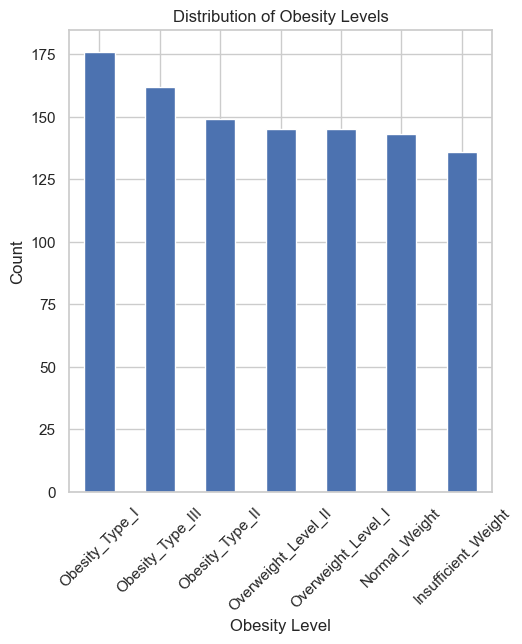

In [15]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
df['NObeyesdad'].value_counts().plot(kind='bar', rot=45)
plt.title('Distribution of Obesity Levels')
plt.xlabel('Obesity Level')
plt.ylabel('Count')


Obesity_Type_I merupakan kategori dengan jumlah data terbanyak (±175).

Diikuti oleh Obesity_Type_III, Obesity_Type_II, dan dua level overweight.

Normal_Weight dan Insufficient_Weight memiliki jumlah paling sedikit.

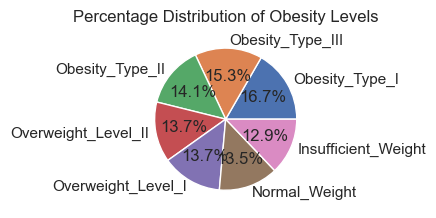

In [16]:
plt.subplot(1, 2, 2)
df['NObeyesdad'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Percentage Distribution of Obesity Levels')
plt.ylabel('')

plt.tight_layout()
plt.show()

Distribusi persentase:

    Obesity_Type_I: ~16.7%

    Obesity_Type_III: ~15.3%

    Obesity_Type_II: ~14.1%

    Overweight_Level_II: ~13.7%

    Overweight_Level_I: ~13.7%

    Normal_Weight: ~13.5%

    Insufficient_Weight: ~12.9%
    
- Distribusi relatif merata antar kelas, meskipun kelas obesitas sedikit lebih dominan.

- Tidak ada kelas yang terlalu kecil (<10%), yang artinya model masih punya cukup data untuk belajar dari masing-masing kategori.

#### Heatmap Korelasi
Heatmap untuk melihat hubungan antara kolom-kolom numerik dalam dataset

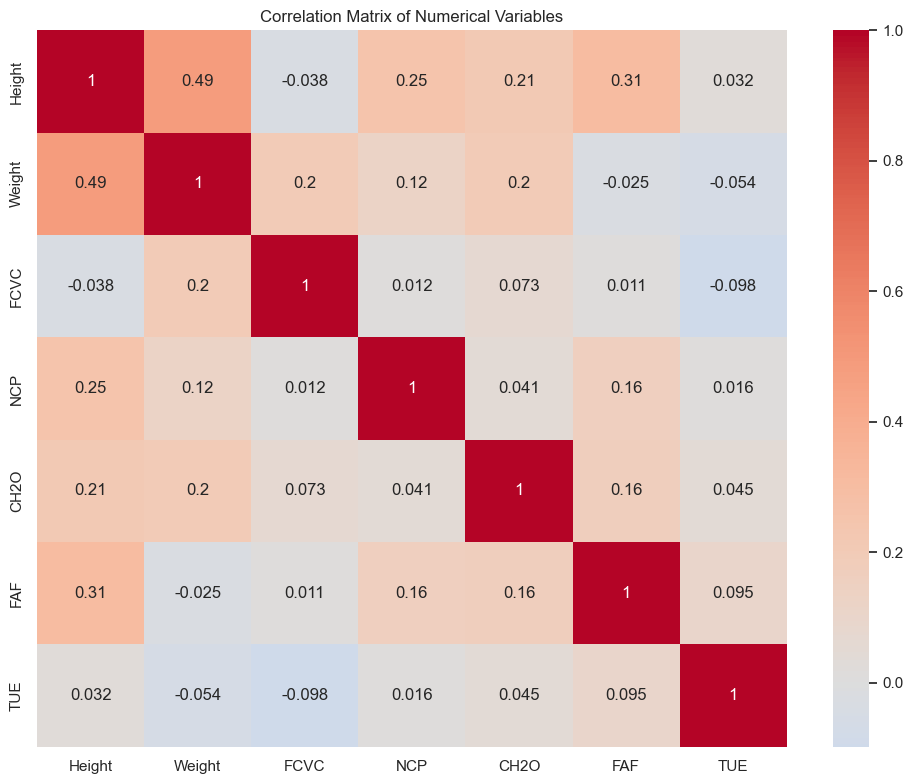

In [17]:
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if 'NObeyesedad' in numerical_cols:
    numerical_cols.remove('NObeyesedad')

plt.figure(figsize=(10, 8))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numerical Variables')
plt.tight_layout()
plt.show()

`Korelasi Tinggi`

    Height vs Weight: 0.49 → Korelasi positif sedang. Semakin tinggi seseorang, cenderung berat badannya juga lebih besar.

    Height vs FAF (Physical Activity Frequency): 0.31 → Orang dengan tinggi badan lebih besar mungkin memiliki kecenderungan untuk beraktivitas fisik lebih sering.

`Korelasi Rendah hingga Lemah`

Sebagian besar korelasi antar variabel lainnya cukup rendah (mendekati 0), menunjukkan bahwa:

    Tidak ada multikolinearitas kuat antar sebagian besar fitur.

    Variabel-variabel seperti FCVC (konsumsi sayur), CH2O (konsumsi air), TUE (waktu di depan layar) memiliki korelasi sangat kecil terhadap fitur lain — sehingga mungkin membawa informasi unik bagi model.

### Hasil EDA:
#### Bedasarkan hasil Explaratory Data Analysis (EDA), Berikut hasil dari dataset:

- Data terdiri  dari 1056 baris dan 17 kolom.

Value Unik:
- Ada nilai yang tidak konsisten pada kolom Age seperti 21 years.

Data Duplicate:
- Duplikat sempurna: 96, 227, 285, 326, 949, 996
- Duplikat parsial: 436, 558, 701, 960

Missing Value:
- FCVC memiliki 37 missing value
- MTRANS memiliki 26 missing value

Outliers:
- Weight
- NCP
- Tidak ada outlier yang signifikan pada kolom lainnya

<span style="color: blue; font-size: 19px;">Data Preprocessing</span>

#### Dari hasil EDA, berikut beberapa langkah-langkah data preprocesssing yang harus dilakukan :

1. Memperbaiki Nilai Tidak Konsisten Pada Kolom Age
2. Handle Duplicate
3. Handle Missing Value
4. Handle Outlier
6. Memisahkan fitur dan target ( x dan y)
7. Encoding Kolom Kategorikal dan Scaling Kolom Numerik Menggunakan Pipeline
8. Split Data Train dan Test

#### Handle Inconsistent Value

mengekstrak hanya angka pada kolom `Age`dan mengubahnya menjadi tipe data numerik (int)

In [18]:
df['Age'] = df['Age'].astype(str).str.extract('(\d+)').astype(int)

In [19]:
print(df['Age'].unique())

[24 23 21 22 26 18 25 20 32 19 38 34 44 39 41 31 17 29 42 27 16 40 33 30
 37 35 36 15 28 55 46 45 43 51 48 14]


#### Handle Duplicate

Menghapus semua baris duplikat

In [20]:
df = df.drop_duplicates()

In [21]:
duplicates = df[df.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [Gender, Age, Height, Weight, family_history_with_overweight, FAVC, FCVC, NCP, CAEC, SMOKE, CH2O, SCC, FAF, TUE, CALC, MTRANS, NObeyesdad]
Index: []


#### Handle Missing Value

Mengisi missing values pada kolom numerikal dengan median pada `FCVC` dan kolom kategorikal dengan modus pada kolom `MTRANS`

In [22]:
df['FCVC'].fillna(df['FCVC'].median(), inplace=True)

In [23]:
df['MTRANS'].fillna(df['MTRANS'].mode()[0], inplace=True)

In [24]:
print(df[['FCVC', 'MTRANS']].isnull().sum())

FCVC      0
MTRANS    0
dtype: int64


#### Handle Outliers

- `Weight` -> Winsorizing (membatasi nilai ekstrem ke batas bawah/atas)

Ada 1 outlier ekstrem (contoh: 173 kg).
Namun, data ini bisa saja valid (misalnya seseorang memang obesitas ekstrem).

- `NCP` -> Pembulatan ke Integer lalu Winsorizing (Batasi nilai ke rentang wajar, misalnya 1–4)

Kolom ini mencerminkan jumlah makanan utama per hari → logikanya bernilai bulat (1, 2, 3, 4)



In [25]:
Q1 = df['Weight'].quantile(0.25)
Q3 = df['Weight'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['Weight'] >= lower_bound) & (df['Weight'] <= upper_bound)]

In [26]:
df['NCP'] = df['NCP'].round().astype(int)

ncp_outliers = df[(df['NCP'] < 1.0) | (df['NCP'] > 4.0)]

In [27]:
print(df['NCP'].value_counts().sort_index())


NCP
1    171
2     84
3    715
4     75
Name: count, dtype: int64


In [28]:
print("Outliers in column Weight:")
weight_outliers = df[(df['Weight'] < lower_bound) | (df['Weight'] > upper_bound)]
print(weight_outliers)

print("\nOutliers in column NCP:")
ncp_outliers = df[(df['NCP'] < 1.0) | (df['NCP'] > 4.0)]
print(ncp_outliers)

Outliers in column Weight:
Empty DataFrame
Columns: [Gender, Age, Height, Weight, family_history_with_overweight, FAVC, FCVC, NCP, CAEC, SMOKE, CH2O, SCC, FAF, TUE, CALC, MTRANS, NObeyesdad]
Index: []

Outliers in column NCP:
Empty DataFrame
Columns: [Gender, Age, Height, Weight, family_history_with_overweight, FAVC, FCVC, NCP, CAEC, SMOKE, CH2O, SCC, FAF, TUE, CALC, MTRANS, NObeyesdad]
Index: []


#### Memisahkan Fitur dan Target ( x dan y)

In [29]:
X = df.drop('NObeyesdad', axis=1)
y = df['NObeyesdad']

##### Identifikasi tipe kolom

In [30]:
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

In [31]:
print(f"Numerical features: {numerical_features}")
print(f"Categorical features: {categorical_features}")

Numerical features: ['Height', 'Weight', 'FCVC', 'CH2O', 'FAF', 'TUE']
Categorical features: ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']


#### Pipeline Preprocessing

menggunakan `ColumnTransformer` dari scikit-learn untuk melakukan preprocessing data. Fitur numerik diproses menggunakan `StandardScaler` untuk standarisasi, sedangkan fitur kategorikal dikodekan menggunakan `OneHotEncoder` dengan opsi `handle_unknown='ignore'` agar dapat menangani kategori tak dikenal saat inferensi.

In [32]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

#### Split Data
Membagi data menjadi data training dan data testing

In [33]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [34]:
print(f"  - Training set: {X_train.shape}")
print(f"  - Test set: {X_test.shape}")

  - Training set: (836, 16)
  - Test set: (209, 16)


<span style="color: red; font-size: 19px;">Model</span>

### Random Forest

Membangun sebuah pipeline machine learning menggunakan `scikit-learn`, yang terdiri dari dua tahap utama:

1. **Preprocessing**: Menggunakan `ColumnTransformer` untuk menstandarisasi fitur numerik dan melakukan one-hot encoding pada fitur kategorikal.
2. **Model**: Menerapkan `RandomForestClassifier` dengan 100 pohon keputusan, kedalaman maksimum 10, minimal 5 sampel untuk split internal, dan minimal 2 sampel pada daun.


In [35]:
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(
        n_estimators=100,
        random_state=42,
        max_depth=10,
        min_samples_split=5,
        min_samples_leaf=2
    ))
])

### Gradient Boosting

Pipeline ini menggunakan `GradientBoostingClassifier` sebagai model utama untuk tugas klasifikasi, dengan preprocessing data yang konsisten menggunakan `ColumnTransformer`.

1. **Preprocessing**: Menstandarisasi fitur numerik dan meng-encode fitur kategorikal menggunakan one-hot encoding.
2. **Model**: Menggunakan `GradientBoostingClassifier` dengan 100 estimator, kedalaman maksimum 6, dan `learning_rate` sebesar 0.1 untuk mengontrol kontribusi setiap pohon.

In [36]:
gb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(
        n_estimators=100,
        random_state=42,
        max_depth=6,
        learning_rate=0.1
    ))
])

<span style="color: blue; font-size: 17px;">Train Model</span>

Menjalankan proses pelatihan (fitting) dua model klasifikasi berbeda menggunakan pipeline

In [37]:
print("Fitting Random Forest...")
rf_pipeline.fit(X_train, y_train)

print("Fitting Gradient Boosting...")
gb_pipeline.fit(X_train, y_train)

Fitting Random Forest...
Fitting Gradient Boosting...


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Height', 'Weight', 'FCVC',
                                                   'CH2O', 'FAF', 'TUE']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Gender',
                                                   'family_history_with_overweight',
                                                   'FAVC', 'CAEC', 'SMOKE',
                                                   'SCC', 'CALC',
                                                   'MTRANS'])])),
                ('classifier',
                 GradientBoostingClassifier(max_depth=6, random_state=42))])

<span style="color: red; font-size: 19px;">Model Result</span>

Evaluasi dua model klasifikasi — **Random Forest** dan **Gradient Boosting** — menggunakan metrik akurasi pada data testing dan cross validation:

- **Prediksi**: Menghasilkan prediksi pada data uji (`X_test`) menggunakan masing-masing pipeline.
- **Akurasi Uji**: Menghitung akurasi pada data uji (`y_test`) dengan `accuracy_score`.
- **Cross-Validation (CV)**: Melakukan validasi silang sebanyak 5 lipatan (`cv=5`) untuk menilai stabilitas model.
- **Ringkasan Performa**: Menyimpan metrik akurasi, rata-rata, dan standar deviasi dari CV ke dalam dictionary `model_performance`.
- **Output Tabel**: Menampilkan hasil evaluasi dalam format tabel agar mudah dibandingkan antar model.

#### Prediction

In [38]:
rf_pred = rf_pipeline.predict(X_test)
gb_pred = gb_pipeline.predict(X_test)

#### Accuracy

In [39]:
rf_accuracy = accuracy_score(y_test, rf_pred)
gb_accuracy = accuracy_score(y_test, gb_pred)

#### CV Score

In [40]:
rf_cv_scores = cross_val_score(rf_pipeline, X_train, y_train, cv=5)
gb_cv_scores = cross_val_score(gb_pipeline, X_train, y_train, cv=5)

#### Compare Result

In [41]:
model_performance = {
    'Random Forest': {
        'pipeline': rf_pipeline,
        'test_accuracy': rf_accuracy,
        'cv_mean': rf_cv_scores.mean(),
        'cv_std': rf_cv_scores.std(),
        'predictions': rf_pred
    },
    'Gradient Boosting': {
        'pipeline': gb_pipeline,
        'test_accuracy': gb_accuracy,
        'cv_mean': gb_cv_scores.mean(),
        'cv_std': gb_cv_scores.std(),
        'predictions': gb_pred
    }
}

In [42]:
print("\nPerbandingan Performa Model:")
print("-" * 70)
print(f"{'Model':<20} {'Test Accuracy':<15} {'CV Mean':<12} {'CV Std':<10}")
print("-" * 70)

for model_name, performance in model_performance.items():
    print(f"{model_name:<20} {performance['test_accuracy']:<15.4f} "
          f"{performance['cv_mean']:<12.4f} {performance['cv_std']:<10.4f}")


Perbandingan Performa Model:
----------------------------------------------------------------------
Model                Test Accuracy   CV Mean      CV Std    
----------------------------------------------------------------------
Random Forest        0.9234          0.8685       0.0265    
Gradient Boosting    0.9617          0.9210       0.0176    


`Test Accuracy`:

    Random Forest: 92.34%

    Gradient Boosting: 96.17%
    
Gradient Boosting mengungguli Random Forest dalam hal akurasi pada data uji, menunjukkan bahwa model ini lebih mampu mengenali pola dari data yang belum pernah dilihat.

`CV Mean`:

    Random Forest: 86.85%

    Gradient Boosting: 92.10%

Pada validasi silang 5-fold, Gradient Boosting tetap lebih unggul, dengan rata-rata akurasi yang lebih tinggi. Ini menunjukkan bahwa performanya lebih stabil dan konsisten pada subset data yang berbeda.

`CV Std`:

    Random Forest: 0.0265

    Gradient Boosting: 0.0176
    
Gradient Boosting juga memiliki standar deviasi yang lebih rendah, yang berarti model ini menghasilkan performa yang lebih konsisten antar lipatan validasi silang, dan kurang rentan terhadap fluktuasi data.

Secara keseluruhan, Gradient Boosting adalah model yang lebih baik untuk dataset ini karena:

    Akurasi yang lebih tinggi pada data uji.

    Performa yang lebih baik dan stabil pada validasi silang.

    Variasi yang lebih rendah antar fold, menunjukkan konsistensi.

Meskipun Random Forest masih memberikan performa yang baik, Gradient Boosting menunjukkan hasil yang lebih kuat baik dari segi akurasi maupun stabilitas.

<span style="color: red; font-size: 19px;">Best Model</span>

In [43]:
best_model_name = max(model_performance.keys(), 
                     key=lambda x: model_performance[x]['cv_mean'])

best_model = model_performance[best_model_name]['pipeline']
print(f"\n Model terbaik: {best_model_name}")
print(f" CV Score: {model_performance[best_model_name]['cv_mean']:.4f} ± "
      f"{model_performance[best_model_name]['cv_std']:.4f}")
print(f" Accuracy: {model_performance[best_model_name]['test_accuracy']:.4f}")


 Model terbaik: Gradient Boosting
 CV Score: 0.9210 ± 0.0176
 Accuracy: 0.9617


<span style="color: red; font-size: 19px;">Best Model Evaluation</span>

#### Classification Report

In [44]:
print(f"{best_model_name}")

best_predictions = model_performance[best_model_name]['predictions']

print("Classification Report:")
print(classification_report(y_test, best_predictions))

Gradient Boosting
Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       0.96      0.93      0.94        27
      Normal_Weight       0.87      0.93      0.90        28
     Obesity_Type_I       0.97      1.00      0.99        35
    Obesity_Type_II       1.00      1.00      1.00        30
   Obesity_Type_III       1.00      1.00      1.00        32
 Overweight_Level_I       0.96      0.89      0.93        28
Overweight_Level_II       0.97      0.97      0.97        29

           accuracy                           0.96       209
          macro avg       0.96      0.96      0.96       209
       weighted avg       0.96      0.96      0.96       209



#### Confusion Matrix

In [45]:
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, best_predictions)
print(cm)


Confusion Matrix:
[[25  2  0  0  0  0  0]
 [ 1 26  0  0  0  1  0]
 [ 0  0 35  0  0  0  0]
 [ 0  0  0 30  0  0  0]
 [ 0  0  0  0 32  0  0]
 [ 0  2  0  0  0 25  1]
 [ 0  0  1  0  0  0 28]]


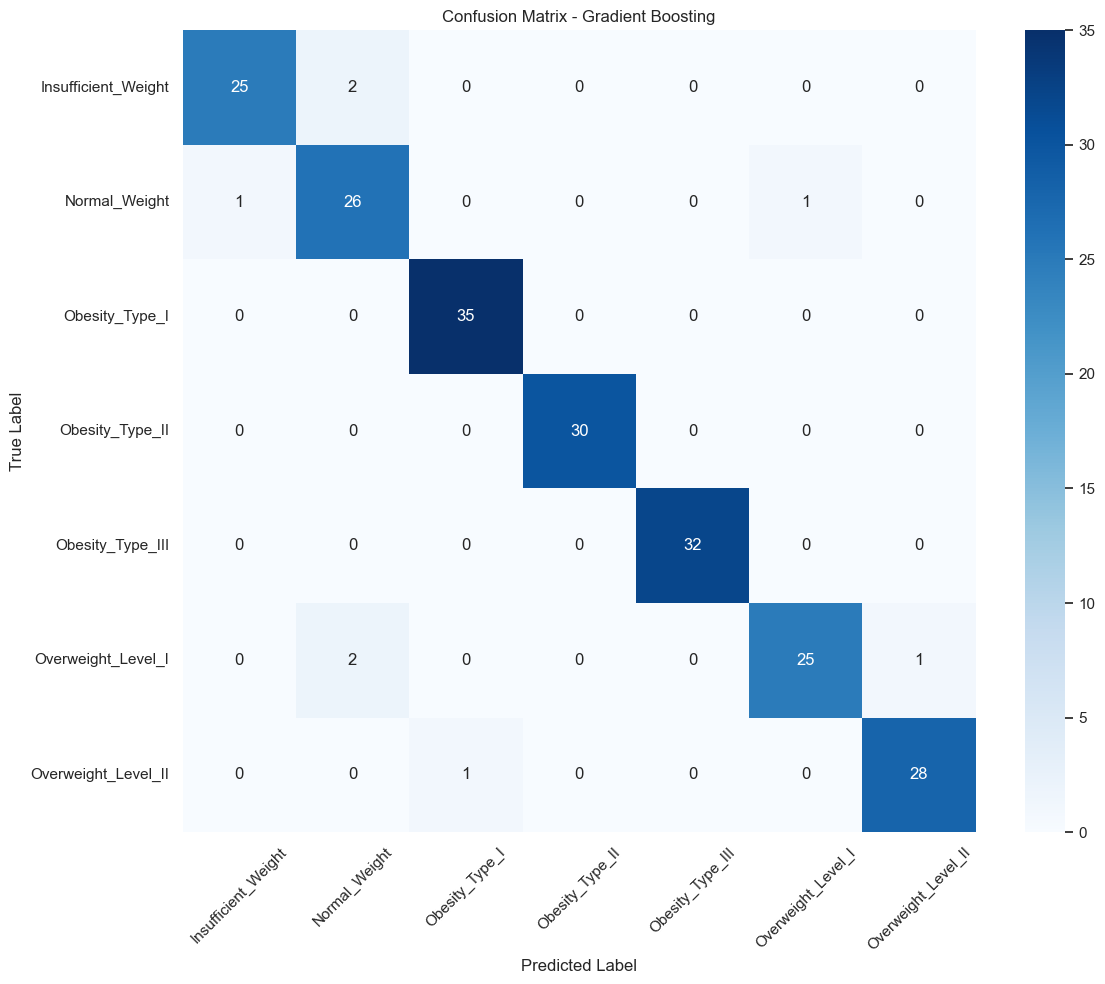

In [46]:
plt.figure(figsize=(12, 10))
class_names = sorted(df['NObeyesdad'].unique())
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
           xticklabels=class_names,
           yticklabels=class_names)
plt.title(f'Confusion Matrix - {best_model_name}')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Kelas 0 (Actual 0):

    Benar diklasifikasikan: 25

    Salah diklasifikasikan sebagai kelas 1: 2

    Akurasi kelas = 25 / (25+2) = 92.6%

Kelas 1 (Actual 1):

    Benar: 26

    Salah ke kelas 0: 1

    Salah ke kelas 5: 1

    Akurasi kelas = 26 / (26+1+1) = 92.9%

Kelas 2 (Actual 2):

    Benar: 35

    Tidak ada kesalahan.

    Akurasi kelas = 100%

Kelas 3 (Actual 3):

    Benar: 30

    Tidak ada kesalahan.

    Akurasi kelas = 100%

Kelas 4 (Actual 4):

    Benar: 32

    Tidak ada kesalahan.

    Akurasi kelas = 100%

Kelas 5 (Actual 5):

    Benar: 25

    Salah ke kelas 1: 2

    Salah ke kelas 6: 1

    Akurasi kelas = 25 / (25+2+1) ≈ 86.2%

Kelas 6 (Actual 6):

    Benar: 28

    Salah ke kelas 2: 1

    Akurasi kelas = 28 / (28+1) ≈ 96.6%
    
Performa secara keseluruhan sangat baik, dengan kebanyakan prediksi berada di diagonal utama (prediksi benar).

<span style="color: red; font-size: 19px;">Best Model Feature Importance</span>

Menampilkan fitur-fitur paling berpengaruh dari model klasifikasi **Gradient Boosting** yang telah dipilih sebagai best model sebelumnya.

In [47]:
best_model = gb_pipeline  

preprocessor = best_model.named_steps['preprocessor']

def get_feature_names_from_column_transformer(ct):
    feature_names = []
    for name, transformer, features in ct.transformers_:
        if transformer == 'drop' or transformer is None:
            continue
        if hasattr(transformer, 'get_feature_names_out'):
            names = transformer.get_feature_names_out(features)
        else:
            names = features
        feature_names.extend(names)
    return feature_names

feature_names = get_feature_names_from_column_transformer(preprocessor)


feature_importance = best_model.named_steps['classifier'].feature_importances_


importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importance
}).sort_values(by='importance', ascending=False)


print("Top 10 Most Important Features:")
print(importance_df.head(10))

Top 10 Most Important Features:
           feature  importance
1           Weight    0.493409
0           Height    0.199433
7      Gender_Male    0.103937
6    Gender_Female    0.047997
2             FCVC    0.033945
3             CH2O    0.026266
22  CALC_Sometimes    0.023890
5              TUE    0.018346
4              FAF    0.016772
12     CAEC_Always    0.006607


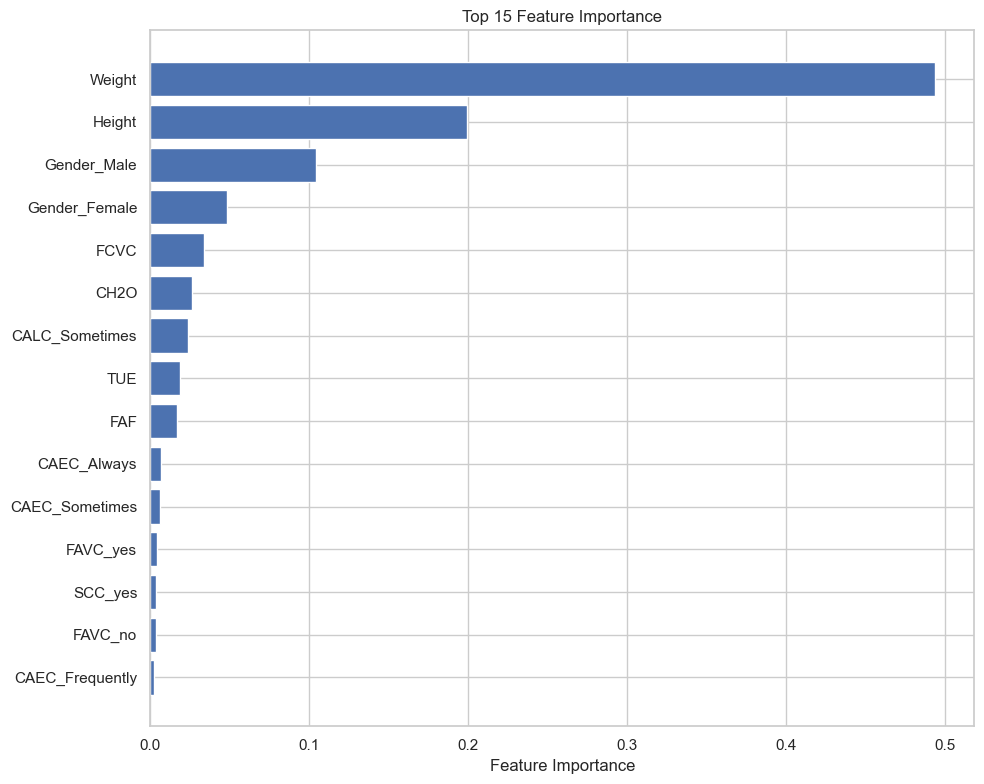

In [48]:
plt.figure(figsize=(10, 8))
top_features = importance_df.head(15)
plt.barh(top_features['feature'], top_features['importance'])
plt.xlabel('Feature Importance')
plt.title('Top 15 Feature Importance')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

Faktor fisik (berat dan tinggi) mendominasi keputusan model, masuk akal karena obesitas sangat bergantung pada BMI.

Gender memainkan peran cukup besar, menunjukkan kemungkinan perbedaan pola obesitas antara pria dan wanita dalam data.

Pola makan dan gaya hidup seperti konsumsi sayur, air putih, olahraga, dan kebiasaan ngemil juga berkontribusi, namun dengan pengaruh yang lebih kecil.

<span style="color: red; font-size: 19px;">Save Best Model With Pickle</span>

Menyimpan best model yang telah dilatih (bersama pipeline-nya) ke dalam file `.pkl` menggunakan modul `pickle`

In [49]:
model_filename = 'C:/COOLYEAH/SEM 4/Model Deployment/UAS/best_obesity_model.pkl'
try:
    with open(model_filename, 'wb') as f:
        pickle.dump(best_model, f)
    print(f"Model berhasil disimpan sebagai '{model_filename}'")
    
except Exception as e:
    print(f"Error saat menyimpan model: {str(e)}")

Model berhasil disimpan sebagai 'C:/COOLYEAH/SEM 4/Model Deployment/UAS/best_obesity_model.pkl'


<span style="color: red; font-size: 19px;">Link Video Penjelasan</span>

- Youtube: https://youtu.be/6ZsBDKFeb0o 
- Google Drive: https://drive.google.com/file/d/1I4aifZx_7KqfGnpXJzEbQRAZpOnGagq0/view?usp=sharing 
